# Análisis de texto en nueva constitución Chilena y comparación a constitución de Bolivia

Esta idea viene de una curiosidad innata a desmitificar dichos de sectores políticos que tienen temor al proceso constituyente que estamos viviendo.


In [1]:
!pip install PyPDF2
import PyPDF2
import re
from PyPDF2 import PdfReader
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.5 MB/s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [2]:
!pip install pdfminer.six

from pdfminer.high_level import extract_text

text = extract_text(r'/content/drive/MyDrive/PROPUESTA-DE-BORRADOR-CONSTITUCIONAL-14.05.22.pdf')
text.replace("\n","")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 4.7 MB/s 
     |████████████████████████████████| 4.0 MB 35.2 MB/s 


"•  Este documento es un consolidado que reúne las normas aprobadas por el Pleno de la Convención Constitucional, ordenadas por comisión. La relación de números de los  artículos  obedece  a  lo  dispuesto  en  los  respectivos  informes  y  no  es  el  orden definitivo, ya que ese proceso deberá ser realizado por la Comisión de Armonización (Actualizado el 14.05.22). CONSOLIDADO NORMAS APROBADAS PARA LA PROPUESTA CONSTITUCIONAL POR EL PLENO DE LA CONVENCIÓN CAPÍTULO (COM 1) DE LA DEMOCRACIA 1.- Artículo 2°.- Democracia paritaria. El Estado reconoce y promueve una sociedad en la que mujeres,  hombres,  diversidades  y  disidencias  sexogenéricas  participen  en  condiciones  de igualdad  sustantiva,  reconociendo  que  su  representación  efectiva  en  el  conjunto  del  proceso democrático  es  un  principio  y  condición  mínima  para  el  ejercicio  pleno  y  sustantivo  de  la democracia y la ciudadanía.  Todos los órganos colegiados del Estado, los órganos autónomos constitucional

## Preprocesamiento del texto del borrador de la nueva constitución y la constitucion de Bolivia

En esta fase:
1. Abrimos el archivo pdf y lo transformamos en una variable `corpus`.

2. Generamos "tokens" con nuestro corpus para preanálisis

También preprocesamos el texto:

* El texto debe estar en minuscula
* Eliminamos "stopwords". Este término se aplica a palabras que frecuentan mucho en las oraciones, pero que a la vez no aportan información relevante.

In [3]:
# Abrimos el archivo pdf que contiene el borrador de la nueva constitución

# Chile
reader_ch = PdfReader("/content/drive/MyDrive/PROPUESTA-DE-BORRADOR-CONSTITUCIONAL-14.05.22.pdf")
number_of_pages_ch = len(reader_ch.pages)

# Bolivia
reader_bo = PdfReader("/content/drive/MyDrive/constitucion_bolivia.pdf")
number_of_pages_bo = len(reader_bo.pages)

### Creación de ambos corpuses

En esta sección extraemos el texto de las constituciones tanto de Chile como Bolivia.


In [4]:
# Corpus Chile
corpus_ch = []

for page_number in range(number_of_pages_ch):
  page_text = reader_ch.pages[page_number].extract_text()
  #page_text = page_text.lower()
  corpus_ch.append(page_text)

# Corpus Bolivia
corpus_bo = []

for page_number in range(number_of_pages_bo):
  page_text = reader_bo.pages[page_number].extract_text()
  corpus_bo.append(page_text)

# Unir corpuses
corpus_ch = "".join(corpus_ch).replace("\n","")
corpus_bo = "".join(corpus_bo) #.replace("\n","")

len(corpus_ch), len(corpus_bo)


(340387, 287271)

In [5]:
tokens_ch = [w for w in word_tokenize(corpus_ch) if w.isalpha()]
tokens_bo = [w for w in word_tokenize(corpus_bo) if w.isalpha()]

# Instanciamos los "stop-words"
stop_words = stopwords.words('spanish')

# Preprocesando - convirtiendo palabras a minúsculas
tokens_ch = [t.lower() for t in tokens_ch]
tokens_bo = [t.lower() for t in tokens_bo]

# Eliminación de stopwords
tokens_ch = [t for t in tokens_ch if t not in stop_words]
tokens_bo = [t for t in tokens_bo if t not in stop_words]


### Cantidad de veces que la palabra "estado" y "persona" están presentes en el borrador de la constitución de Chile y la constitución de Bolivia del 2022.

In [290]:
print("Chile:")
print("\nCantidad veces de Estado: {}".format(corpus_ch.count("Estado")), "\nCantidad veces estado: {}".format(corpus_ch.count("estado")))
print("\nCantidad veces de Persona: {}".format(corpus_ch.count("Persona")), "\nCantidad veces persona: {}".format(corpus_ch.count("persona")))
print("\nBolivia:")
print("\nCantidad veces de Estado: {}".format(corpus_bo.count("Estado")), "\nCantidad veces estado: {}".format(corpus_bo.count("estado")))
print("\nCantidad veces de Persona: {}".format(corpus_bo.count("Persona")), "\nCantidad veces persona: {}".format(corpus_bo.count("persona")))


Chile:

Cantidad veces de Estado: 371 
Cantidad veces estado: 39

Cantidad veces de Persona: 2 
Cantidad veces persona: 298

Bolivia:

Cantidad veces de Estado: 515 
Cantidad veces estado: 38

Cantidad veces de Persona: 0 
Cantidad veces persona: 151


In [7]:
print("Bolivia:")
print("\nCantidad veces Estado: {}".format(corpus_bo.count("Estado")), "\nCantidad veces estado: {}".format(corpus_bo.count("estado")))
print("\nCantidad veces Persona: {}".format(corpus_bo.count("Persona")), "\nCantidad veces persona: {}".format(corpus_bo.count("persona")))

Bolivia:

Cantidad veces Estado: 515 
Cantidad veces estado: 38

Cantidad veces Persona: 0 
Cantidad veces persona: 151


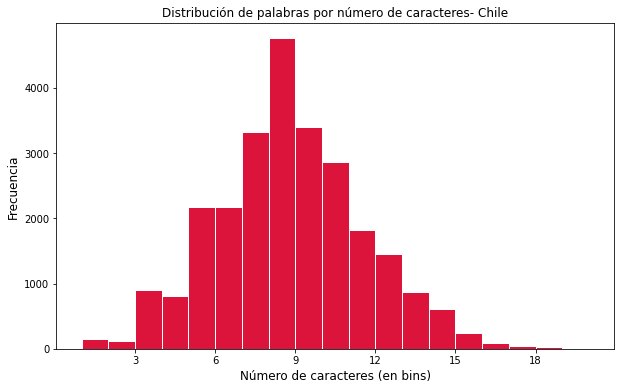

In [8]:
word_lengths_ch = [len(w) for w in tokens_ch]
word_lengths_bo = [len(w) for w in tokens_bo]


ax = plt.figure(figsize=(10,6)).gca();
plt.title("Distribución de palabras por número de caracteres- Chile");
plt.hist(word_lengths_ch, 
         color = "crimson",
         bins=range(min(word_lengths_ch), max(word_lengths_ch)),
         edgecolor='w'
         );
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Número de caracteres (en bins)", fontsize=12);
plt.ylabel("Frecuencia", fontsize=12);


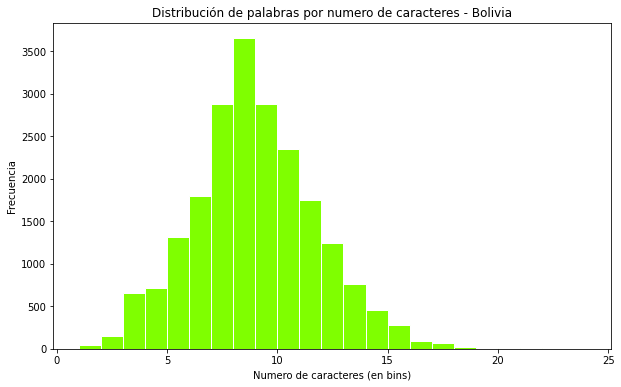

In [9]:
ax1 = plt.figure(figsize=(10,6)).gca()
plt.title("Distribución de palabras por numero de caracteres - Bolivia");
plt.hist(word_lengths_bo, 
         color = "chartreuse", 
         bins=range(min(word_lengths_bo), max(word_lengths_bo)),
         edgecolor='w'
         );
plt.xlabel("Numero de caracteres (en bins)");
plt.ylabel("Frecuencia");

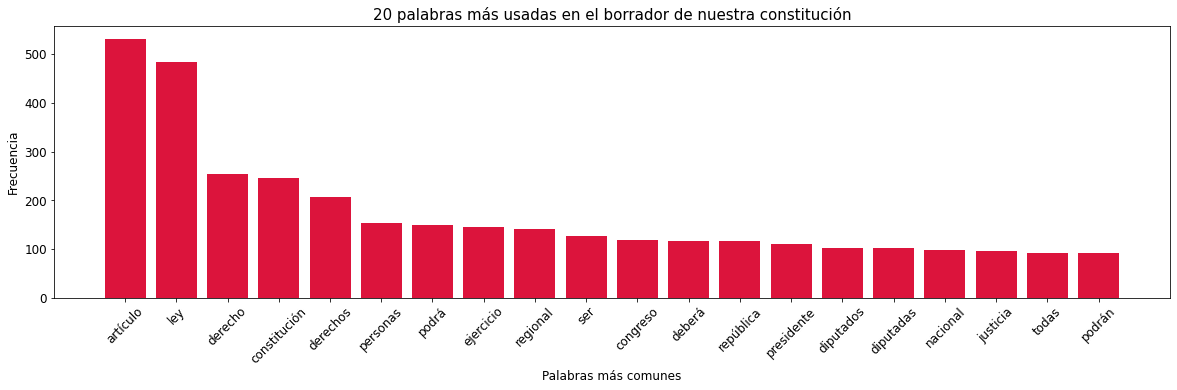

In [10]:
from collections import Counter
import matplotlib

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

n_mostcommon = 20

bow_simple_ch = Counter(tokens_ch)
bow_simple_bo = Counter(tokens_bo)

y_ch = [count for tag, count in bow_simple_ch.most_common(n_mostcommon)]
x_ch = [tag for tag, count in bow_simple_ch.most_common(n_mostcommon)]

y_bo = [count for tag, count in bow_simple_bo.most_common(n_mostcommon)]
x_bo = [tag for tag, count in bow_simple_bo.most_common(n_mostcommon)]

plt.figure(figsize=(20,5));
plt.bar(x_ch, y_ch, color='crimson');
plt.title("{} palabras más usadas en el borrador de nuestra constitución".format(n_mostcommon), fontsize=15)
plt.xticks(rotation=45);
plt.ylabel("Frecuencia", fontsize=12);
plt.xlabel("Palabras más comunes", fontsize=12);

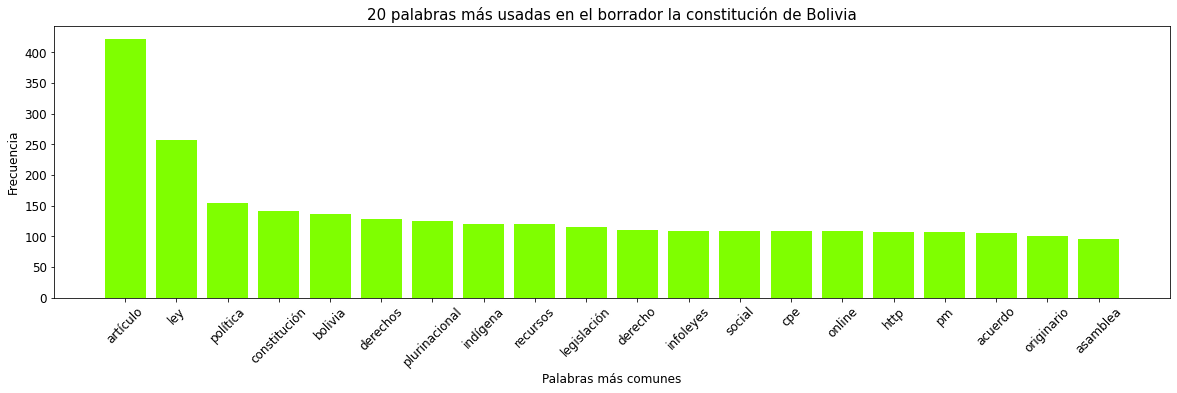

In [11]:
plt.figure(figsize=(20,5));
plt.bar(x_bo, y_bo, color='chartreuse');
plt.title("{} palabras más usadas en el borrador la constitución de Bolivia".format(n_mostcommon), fontsize=15)
plt.xticks(rotation=45);
plt.xlabel("Palabras más comunes", fontsize=12);
plt.ylabel("Frecuencia", fontsize=12);

## Modelamiento de temas por artículos para el borrador de la constitución Chilena

En esta sección debemos obtener cada artículo con su índice de inicio y término para aplicarlo en el corpus y extraer el texto correspondiente de cada artículo.

* Imprimimos el corpus chileno
* Mediante el uso de RegEx, extraemos los artículos y sus índices de inicio y término.
* Utilizamos el índice final del `artículo[i]` con el índice inicial del `artículo[i+1]` para extraer el texto perteneciente a cada artículo
* Extraemos el texto del artículo final
* Procesamos los textos y artículos para analizar los temas de cada artículo:
  * Creamos un "bag of words"
  * Creamos modelo tf-idf
* Visualizamos el resultado del modelo tf-idf en un gráfico de barra, tomando una muestra aleatoria del corpus

In [12]:
# Imprimimos el corpus para comprender mejor cómo se estructura la nomenclatura de artículos.

corpus_ch = re.sub("\s\s+" , " ", corpus_ch)
corpus_ch

" • Este documento es un consolidado que reúne las normas aprobadas por el Pleno de la Convención Constitucional, ordenadas por comisión. La relación de números de los artículos obedece a lo dispuesto en los respectivos informes y no es el orden definitivo, ya que ese proceso deberá ser realizado por la Comisión de Armonización (Actualizado el 14.05.22). CONSOLIDADO NORMAS APROBADAS PARA LA PROPUESTA CONSTITUCIONAL POR EL PLENO DE LA CONVENCIÓN CAPÍTULO (COM 1) DE LA DEMOCRACIA 1.- Artículo 2°.- Democracia paritaria. El Estado reconoce y promueve una sociedad en la que mujeres, hombres, diversidades y disidencias sexogenéricas participen en condiciones de igualdad sustantiva, reconociendo que su representación efectiva en el conjunto del proceso democrático es un principio y condición mínima para el ejercicio pleno y sustantivo de la democracia y la ciudadanía. Todos los órganos colegiados del Estado, los órganos autónomos constitucionales y los órganos superiores y directivos de la Ad

In [13]:
patron = r'\d+.-\s*Artículo\s+\w+..'
articulos = re.findall(patron,corpus_ch)
len(articulos)

499

In [17]:
indices = [(m.start(0), m.end(0)) for m in re.finditer(patron, corpus_ch)]

texto_artic_lista = []
for i in range(len(indices)-1):
  texto = corpus_ch[indices[i][1]:indices[i+1][0]]
  texto_artic_lista.append(texto)

texto_artic_lista.append(corpus_ch[indices[-1][1]:])

In [ ]:
len(texto_artic_lista), len(indices)

Antes de seguir avanzando, necesitamos visualizar mejor cada artículo. A continuación establecemos una función que imprime un artículo aleatorio del borrador de nuestra constitución:

In [295]:
import random

def get_random_text(string_list,articulo):
  rand_int = random.randint(0,len(string_list))
  return articulo[rand_int], string_list[rand_int]

In [297]:
get_random_text(texto_artic_lista, articulos)

('435.- Artículo 62.-',
 ' Órgano de protección de consumidores. Existirá un órgano encargado de la protección de las personas en su rol de consumidoras y usuarias de bienes y servicios, el cual contará con facultades interpretativas, fiscalizadoras, sancionadoras y las demás que le otorgue la ley. Capítulo.- Justicia Constitucional. ')


### Creacion de un "Bag-of-words"

* Metodo básico para encontrar temas dentro de un texto
* Hay que tokenizar la data
* ...despues contar los tokens
* Mientras más frecuente sea una palabra, tal vez es más importante
* Puede ser una buena forma de determinar palabras importantes dentro de un texto.

Vamos a crear una función que entrega el texto de un artículo aleatorio.

In [298]:
!python -m spacy download es_core_news_sm

import spacy
import es_core_news_sm


nlp = es_core_news_sm.load()

def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and     
    t.isalpha()]
    return lexical_tokens
word_list = normalize("Soy un texto de prueba. ¿Cuántos tokens me quedarán después de la normalización?")
word_list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


['texto', 'prueba', 'tokens', 'quedarán', 'normalización']

In [283]:
lemmas_lista = []
for i in range(len(texto_artic_lista)):
  text = texto_artic_lista[i]
  doc = nlp(text)
  lemmas = [tok.lemma_.lower() for tok in doc if len(tok) > 3]
  lemmas_lista.append(lemmas)

#lemmas_lista[0]



In [55]:
tokens = []
for i in range(len(texto_artic_lista)):
  token = normalize(texto_artic_lista[i])
  tokens.append(token)

### Análisis tf-idf con Gensim

Este tipo de análisis rescata palabras importantes que son propias del tema para cada observación, en este caso, el artículo correspondiente. De esta forma, este análisis nos ayuda a comprender, en resumidas cuentas cuales conceptos son importantes en cada artículo bajo el criterio de su baja frecuencia en los otros artículos.



In [179]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import TfidfModel
import numpy as np
import pandas as pd
dictionary = Dictionary(lemmas_lista)

corpus = [dictionary.doc2bow(token) for token in lemmas_lista]
model = TfidfModel(corpus)

In [293]:
tfidf_weights = model[corpus[20]]

tfidf_weights

def get_info_from_random_tfidf(model=model,corpus=corpus,articles=articulos,num_palabras=10):
  
  # Crear numero aleatorio para obtener una muestra de las palabras importantes
  random_int = random.randint(0,len(corpus))

  # Obtenemos los "weights" o ganancias del texto de un artículo aleatorio
  tfidf_weights = model[corpus[random_int]]

  # Sort the weights from highest to lowest: sorted_tfidf_weights
  sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

  x_list = []
  y_list = []

  # Print the top 5 weighted words
  for term_id, weight in sorted_tfidf_weights[:num_palabras]:

    x_list.append(dictionary.get(term_id))
    y_list.append(weight)
    # Display text results
    # print(dictionary.get(term_id), weight)
  print(articles[random_int])
  df = pd.DataFrame({"palabra":x_list, "relevancia":y_list})
  print(df.head(num_palabras))
  ax = df.groupby("palabra").sum().sort_values(by="relevancia",
                                               ascending=False).plot(kind="bar", 
                                                                     color="crimson", 
                                                                     ylabel="relevancia segun modelo tf-idf", 
                                                                     figsize=(10,5),
                                                                     title="Las {} palabras más relevantes en {}".format(num_palabras,articles[random_int]))
  plt.xticks(rotation=45)


407.- Artículo 26.-
           palabra  relevancia
0       defensoría    0.584590
1           pueblo    0.306421
2          emanado    0.203262
3       imperativa    0.203262
4        asegurado    0.180584
5          humanos    0.163525
6    internacional    0.161948
7         utilidad    0.157905
8   desconcentrado    0.157905
9          omisión    0.150605
10        derechos    0.146726
11      denominado    0.139596
12       funcionar    0.127927
13       finalidad    0.121961
14      ratificado    0.119343


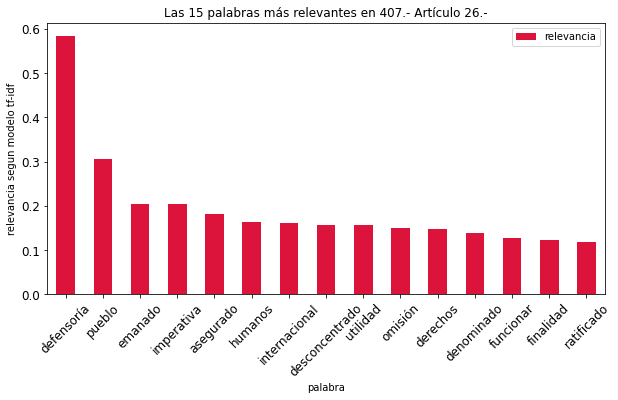

In [301]:
get_info_from_random_tfidf(num_palabras=15)

170.- Artículo 30.-
           palabra  relevancia
0      ministerios    0.407789
1        servicios    0.377833
2         públicos    0.356578
3         facultad    0.227344
4        presencia    0.217748
5    transferencia    0.203578
6        solicitar    0.187893
7          regular    0.168509
8      competencia    0.160291
9           cultad    0.153000
10  eficientemente    0.153000
11      supletoria    0.153000
12          región    0.143665
13        gobierno    0.136860
14    coordinar él    0.125944


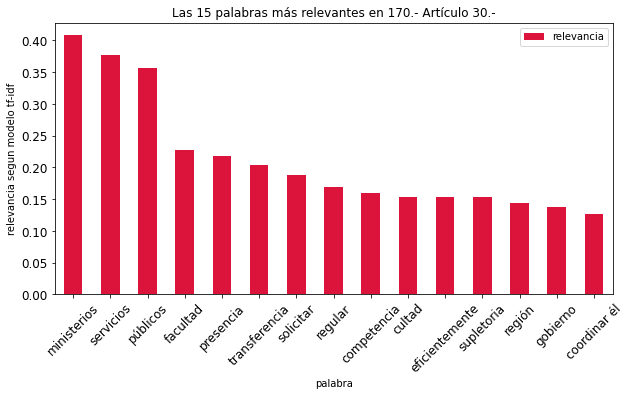

In [300]:
get_info_from_random_tfidf(num_palabras=15)